In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import warnings
warnings.filterwarnings("ignore")

In [2]:
%cd "C:\Users\zaida\OneDrive\Desktop\Machine Learning\ML PROJECTS\Big Mart Sales Dataset\Big Mart Sales Dataset"

C:\Users\zaida\OneDrive\Desktop\Machine Learning\ML PROJECTS\Big Mart Sales Dataset\Big Mart Sales Dataset


In [3]:
df = pd.read_csv("Train.csv")

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [9]:
# So in this dataframe item_outlet_Sales is the target variable 
# and also in this dataframe there are two variable that we dont need 
# 1) item_identifier  2) Outlet_identifier So i will drop these variables

In [10]:
df.drop(["Outlet_Identifier","Item_Identifier"],axis=1,inplace=True)

In [11]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


# Exploring the features

#### This column indicating fat content 

In [12]:
# In this column i found some duplicate values like Low Fat = LF = low fat & Regular = reg
df.Item_Fat_Content.value_counts()
# Here i will replace these duplicates values.

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [13]:
df["Item_Fat_Content"] = df.Item_Fat_Content.apply(lambda x :"Low Fat" if x == "LF" or x =="low fat" else x)

In [14]:
df["Item_Fat_Content"] = df.Item_Fat_Content.replace("reg","Regular")

In [15]:
df.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

#### This column show types of items 

In [16]:
df.Item_Type.value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

#### Size of the outlets

In [17]:
df.Outlet_Size.value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

#### Location of the Outlet

In [18]:
df.Outlet_Location_Type.value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

#### Type of the Outlet



In [19]:
df.Outlet_Type.value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

#### Missing Values

In [20]:
df["Item_Weight"].isna().sum()

1463

In [21]:
df["Item_Weight"].mean()

12.857645184135976

In [22]:
df["Item_Weight"].median()

12.6

In [23]:
# Here i will fill mean value in place of missing values of Item_Weight
df["Item_Weight"] = df["Item_Weight"].fillna(df["Item_Weight"].mean())

In [24]:
df.Item_Weight.isna().sum()

0

In [25]:
# Next is Outlet_Size 
df["Outlet_Size"].isna().sum()

2410

In [26]:
df["Outlet_Size"]

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [27]:
df["Outlet_Size"].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [28]:
# Here i will go with mode 
df["Outlet_Size"] = df["Outlet_Size"].fillna("Medium")

In [29]:
df["Outlet_Size"]

0       Medium
1       Medium
2       Medium
3       Medium
4         High
         ...  
8518      High
8519    Medium
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [30]:
df["Outlet_Size"].isna().sum()

0

In [31]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


#### Data Visualization

In [33]:
# Frequency counts and pie Diagram with percentage for variable Outlet_Size , Outlet_location_type , Outlet_type,Item Fat content

<Axes: ylabel='count'>

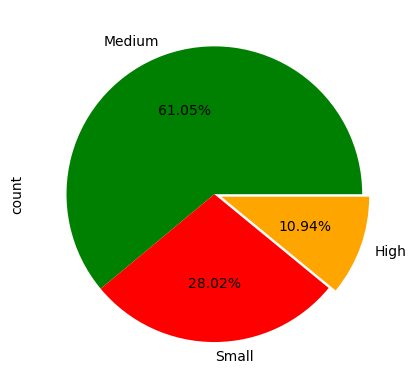

In [34]:
explode=[0,0,0.05]
df.Outlet_Size.value_counts().plot(kind="pie",autopct="%.2F%%",colors=["green","red","orange"],explode=explode)

<Axes: ylabel='count'>

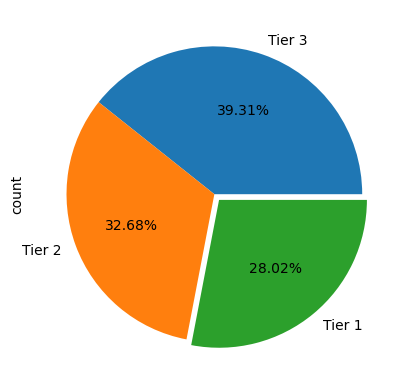

In [35]:
explode=[0,0,0.05]
df.Outlet_Location_Type.value_counts().plot(kind="pie",autopct="%.2F%%",explode=explode)

<Axes: ylabel='count'>

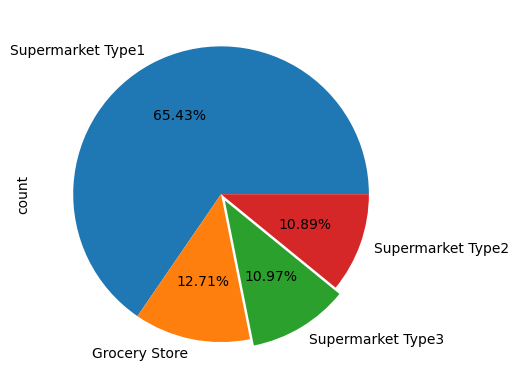

In [36]:
explode=[0,0,0.05,0]
df["Outlet_Type"].value_counts().plot(kind="pie",autopct="%.2F%%",explode=explode)

<Axes: ylabel='count'>

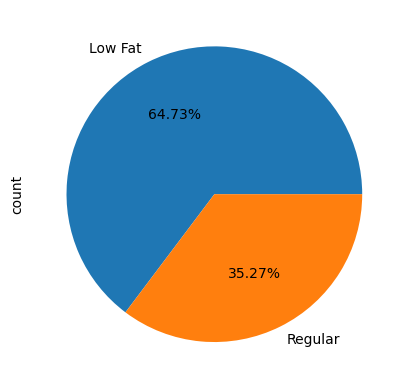

In [37]:
df.Item_Fat_Content.value_counts().plot(kind="pie",autopct="%.2F%%")

In [38]:
# Cross Tabulation and Stacked Bar plot for variable Outlet_location_type , Outlet_size & Outlet_type

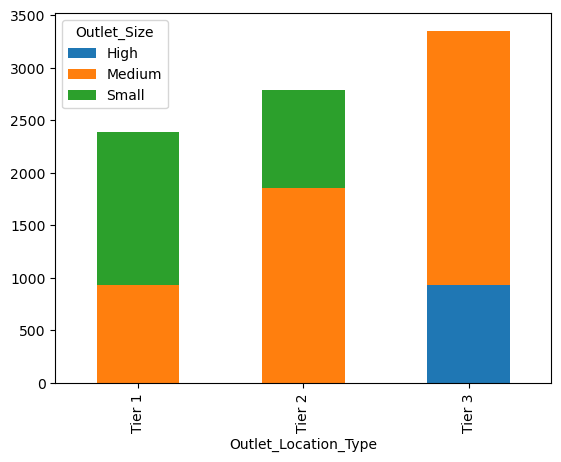

In [39]:
ax = pd.crosstab(df.Outlet_Location_Type,df.Outlet_Size).plot(kind="bar",stacked=True)

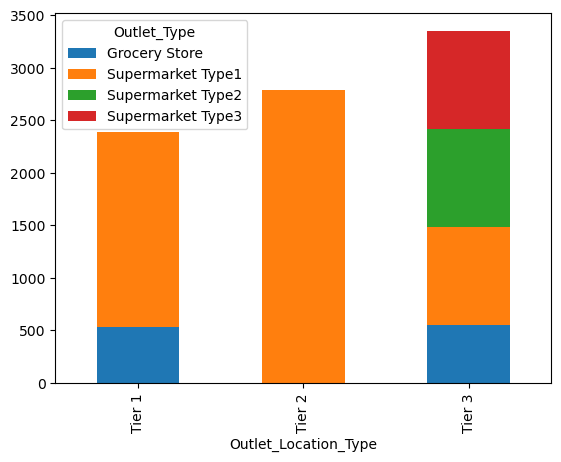

In [40]:
ax = pd.crosstab(df.Outlet_Location_Type,df.Outlet_Type).plot(kind="bar",stacked=True)

In [41]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


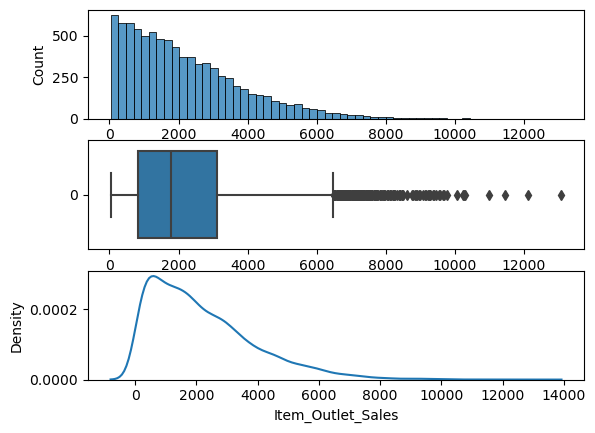

In [42]:
# Histogram, boxplot and Density Curve 
fig,ax=plt.subplots(3,1)
sns.histplot(df.Item_Outlet_Sales,ax=ax[0])
sns.boxplot(df.Item_Outlet_Sales,ax=ax[1],orient="h")
sns.kdeplot(df.Item_Outlet_Sales,ax=ax[2])
plt.show()

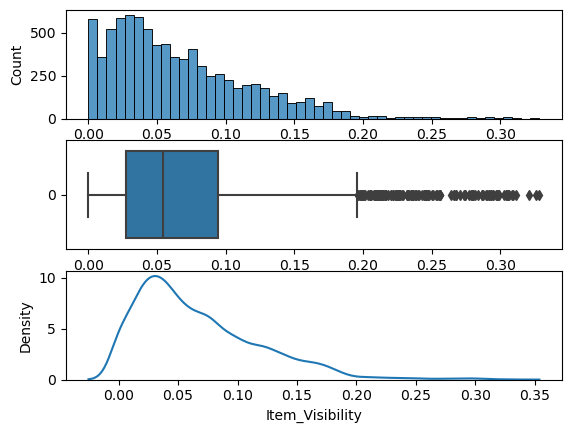

In [43]:
# Histogram, boxplot and Density Curve 
fig,ax=plt.subplots(3,1)
sns.histplot(df.Item_Visibility,ax=ax[0])
sns.boxplot(df.Item_Visibility,ax=ax[1],orient="h")
sns.kdeplot(df.Item_Visibility,ax=ax[2])
plt.show()

### Hypothesis

####  Test null: Average selling price of diffrent location outlets are same

In [44]:
np.round(df.Item_Outlet_Sales.groupby(df.Outlet_Location_Type).mean(),2)
# Since more than two groups/classes so we go with one way anova

Outlet_Location_Type
Tier 1    1876.91
Tier 2    2323.99
Tier 3    2279.63
Name: Item_Outlet_Sales, dtype: float64

In [45]:
# Split data
T1 = df[df["Outlet_Location_Type"]=="Tier 1"]
T2 = df[df["Outlet_Location_Type"]=="Tier 2"]
T3 = df[df["Outlet_Location_Type"]=="Tier 3"]

In [46]:
from scipy.stats import f_oneway

In [47]:
f_oneway(T1.Item_Outlet_Sales, T2.Item_Outlet_Sales, T3.Item_Outlet_Sales )
# Since pvalue=5.2228172988842975e-24 is less than 0.05, Reject null hypothesis

F_onewayResult(statistic=53.947739874560675, pvalue=5.2228172988842975e-24)

#### Test null: Average selling price of diffrent outlet size is equal

In [48]:
np.round(df.Item_Outlet_Sales.groupby(df.Outlet_Size).mean(),2)
# Since more than 2 classes/groups , one way anove

Outlet_Size
High      2299.00
Medium    2283.73
Small     1912.15
Name: Item_Outlet_Sales, dtype: float64

In [49]:
# Splitting data
High = df[df["Outlet_Size"]=="High"]
Medium = df[df["Outlet_Size"]=="Medium"]
Small = df[df["Outlet_Size"]=="Small"]

In [50]:
f_oneway(High.Item_Outlet_Sales, Medium.Item_Outlet_Sales, Small.Item_Outlet_Sales)
# Since pvalue=9.642803947830672e-19 is less than 0.05 , Reject null hypothesis

F_onewayResult(statistic=41.68553754650835, pvalue=9.642803947830672e-19)

#### Test null: Average selling price of diffrent outlet type is equal

In [51]:
np.round(df.Item_Outlet_Sales.groupby(df.Outlet_Type).mean(),2)
# Again more than 2 groups/classes , OneWay Anova

Outlet_Type
Grocery Store         339.83
Supermarket Type1    2316.18
Supermarket Type2    1995.50
Supermarket Type3    3694.04
Name: Item_Outlet_Sales, dtype: float64

In [52]:
# Splitting Data
Grocery = df[df["Outlet_Type"]=="Grocery Store"]
Typeone = df[df["Outlet_Type"]=="Supermarket Type1"]
Typetwo = df[df["Outlet_Type"]=="Supermarket Type2"]
Typethree = df[df["Outlet_Type"]=="Supermarket Type3"]

In [53]:
f_oneway(Grocery.Item_Outlet_Sales, Typeone.Item_Outlet_Sales, Typetwo.Item_Outlet_Sales, Typethree.Item_Outlet_Sales)
# Since p value less than 0.05 , Reject null hypothesis

F_onewayResult(statistic=894.6500119018012, pvalue=0.0)

#### Test null: Average Item_MRP of diffrent Outlet_Location_Type is same 

In [54]:
np.round(df.Item_MRP.groupby(df.Outlet_Location_Type).mean(),2)
# Again more than 2 groups/classes , Oneway Anova

Outlet_Location_Type
Tier 1    140.87
Tier 2    141.17
Tier 3    140.94
Name: Item_MRP, dtype: float64

In [55]:
# Split data
T1 = df[df["Outlet_Location_Type"]=="Tier 1"]
T2 = df[df["Outlet_Location_Type"]=="Tier 2"]
T3 = df[df["Outlet_Location_Type"]=="Tier 3"]

In [56]:
f_oneway(T1.Item_MRP, T2.Item_MRP, T3.Item_MRP )
# Since pvalue=0.9831607737157869 is greater than 0.05, fail to Reject null hypothesis

F_onewayResult(statistic=0.01698265192279881, pvalue=0.9831607737157869)

#### Test:
#### Null : There is no assosiation between Item_MRP and Item_vesibility
#### Alt : There is an assosiation between Item_MRP and Item_vesibility

In [57]:
from scipy.stats import chi2_contingency

In [58]:
chi2_contingency(pd.crosstab(df.Item_MRP, df.Item_Visibility))
# Since p-value is pvalue=6.279666596646834e-18 less than 0.05 , Reject Null

Chi2ContingencyResult(statistic=46860347.541566394, pvalue=6.279666596646834e-18, dof=46777623, expected_freq=array([[6.17153584e-02, 1.17329579e-04, 1.17329579e-04, ...,
        1.17329579e-04, 1.17329579e-04, 1.17329579e-04],
       [6.17153584e-02, 1.17329579e-04, 1.17329579e-04, ...,
        1.17329579e-04, 1.17329579e-04, 1.17329579e-04],
       [6.17153584e-02, 1.17329579e-04, 1.17329579e-04, ...,
        1.17329579e-04, 1.17329579e-04, 1.17329579e-04],
       ...,
       [1.23430717e-01, 2.34659158e-04, 2.34659158e-04, ...,
        2.34659158e-04, 2.34659158e-04, 2.34659158e-04],
       [1.23430717e-01, 2.34659158e-04, 2.34659158e-04, ...,
        2.34659158e-04, 2.34659158e-04, 2.34659158e-04],
       [1.23430717e-01, 2.34659158e-04, 2.34659158e-04, ...,
        2.34659158e-04, 2.34659158e-04, 2.34659158e-04]]))

#### Test:
#### Null : There is no assosiation between Item_MRP and Item_weigh
#### Alt : There is an assosiation between Item_MRP and Item_weight

In [59]:
chi2_contingency(pd.crosstab(df.Item_MRP, df.Item_Weight))
# Since p value is less than 0.05 , Reject null

Chi2ContingencyResult(statistic=2576585.132150349, pvalue=0.0, dof=2463855, expected_freq=array([[0.00046932, 0.00058665, 0.00082131, ..., 0.00058665, 0.00281591,
        0.00082131],
       [0.00046932, 0.00058665, 0.00082131, ..., 0.00058665, 0.00281591,
        0.00082131],
       [0.00046932, 0.00058665, 0.00082131, ..., 0.00058665, 0.00281591,
        0.00082131],
       ...,
       [0.00093864, 0.0011733 , 0.00164261, ..., 0.0011733 , 0.00563182,
        0.00164261],
       [0.00093864, 0.0011733 , 0.00164261, ..., 0.0011733 , 0.00563182,
        0.00164261],
       [0.00093864, 0.0011733 , 0.00164261, ..., 0.0011733 , 0.00563182,
        0.00164261]]))

In [60]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


### Encoding

In [61]:
from sklearn.preprocessing import OrdinalEncoder , OneHotEncoder 
ord = OrdinalEncoder()
one = OneHotEncoder(drop='first')

In [62]:
# Here i am using Ordinal encoder cause these are ordinal categorical Data
o = ord.fit_transform(df[["Outlet_Size"]])

In [63]:
df["Outlet_Size"] = o.astype(int)

In [64]:
a = ord.fit_transform(df[["Outlet_Location_Type"]])

In [65]:
df["Outlet_Location_Type"] = a.astype(int) 

In [66]:
df = pd.get_dummies(df,drop_first=True)

In [67]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,...,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,1,0,3735.1380,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,5.92,0.019278,48.2692,2009,1,2,443.4228,True,False,False,...,False,False,False,False,False,True,False,False,True,False
2,17.50,0.016760,141.6180,1999,1,0,2097.2700,False,False,False,...,False,True,False,False,False,False,False,True,False,False
3,19.20,0.000000,182.0950,1998,1,2,732.3800,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,8.93,0.000000,53.8614,1987,0,2,994.7052,False,False,False,...,True,False,False,False,False,False,False,True,False,False


In [68]:
# Checking for multicolinearity

<Axes: >

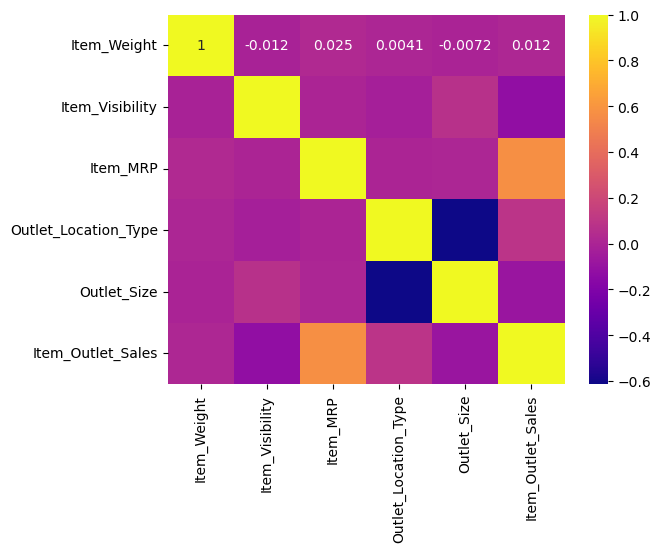

In [69]:
sns.heatmap(df[["Item_Weight","Item_Visibility","Item_MRP","Outlet_Location_Type","Outlet_Size","Item_Outlet_Sales"]].corr(),annot=True,cmap="plasma")

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

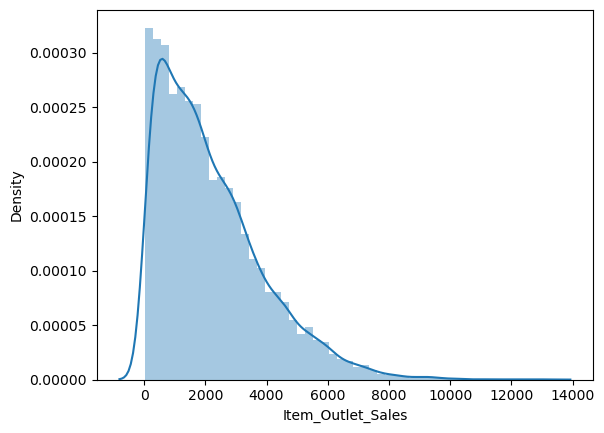

In [70]:
# Target Variable
sns.distplot(df.Item_Outlet_Sales)
# So my target varaible is skewed

In [71]:
df.Item_Outlet_Sales.skew()

1.1775306028542796

In [72]:
np.round(df.Item_Outlet_Sales.skew())

1.0

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

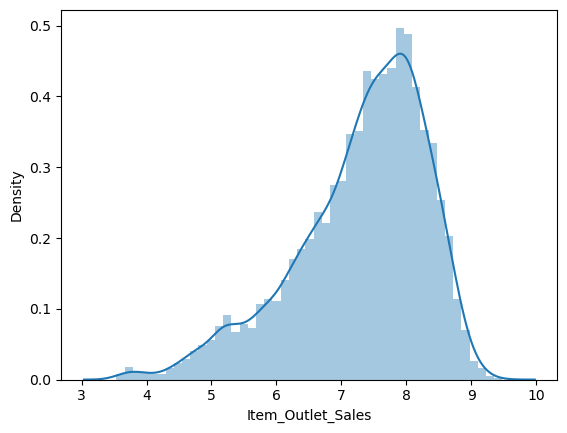

In [73]:
# Here i am converting my target variable to natural log
sns.distplot(np.log1p(df['Item_Outlet_Sales']))
# Here you see my target variable became little Right skewed

In [74]:
np.log(df.Item_Outlet_Sales).skew()

-0.887753343209305

In [75]:
np.round(np.log(df.Item_Outlet_Sales).skew())

-1.0

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

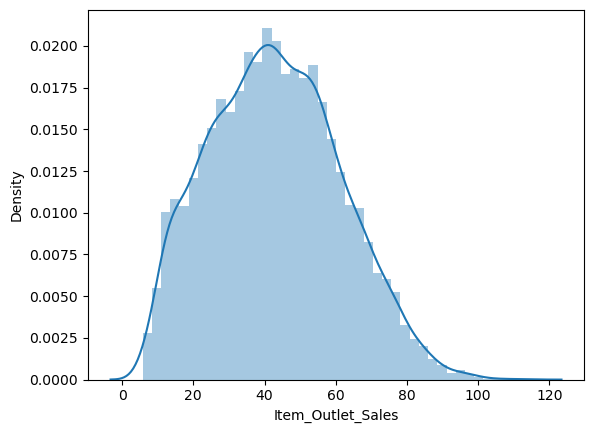

In [76]:
sns.distplot(np.sqrt(df['Item_Outlet_Sales']))
# Take the square root of the target variable. This is another transformation that can help reduce the impact of extreme values.

In [77]:
np.sqrt(df['Item_Outlet_Sales']).skew()

0.23467599347099247

In [78]:
np.round(np.sqrt(df['Item_Outlet_Sales']).skew())

0.0

### Splitting Data

In [79]:

X = df.drop("Item_Outlet_Sales",axis=1)
y = np.sqrt(df["Item_Outlet_Sales"])

In [80]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.20)

#### Linear Regression 

In [81]:
from sklearn.linear_model import LinearRegression

In [82]:
lr = LinearRegression()

In [83]:
lr.fit(Xtrain,ytrain)

LinearRegression()

In [84]:
# Testing Score
lr.score(Xtest,ytest)

0.6323473655785377

In [85]:
#Training Score
lr.score(Xtrain , ytrain )

0.6611266336006576

#### Decision Tree Regressor

In [86]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(Xtrain,ytrain)

DecisionTreeRegressor()

In [87]:
# Testing Score
dt.score(Xtest,ytest)

0.2980120364402995

In [89]:
# Training Score
dt.score(Xtrain,ytrain)
# Model is Overfitted

1.0

### Feature Scaling

In [90]:
from sklearn.preprocessing import StandardScaler

In [94]:
std = StandardScaler()

In [95]:
std.fit(Xtrain)

StandardScaler()

In [96]:
std_train = std.transform(Xtrain)
std_test = std.transform(Xtest)

In [103]:
lr1 = LinearRegression()

In [104]:
lr1.fit(std_train,ytrain)

LinearRegression()

In [105]:
lr1.score(std_test,ytest)

0.6323473655785379

In [106]:
std_train.shape

(6818, 25)

In [108]:
DT1 = DecisionTreeRegressor().fit(std_train,ytrain)

In [109]:
DT1.score(std_test,ytest)

0.30296395018810984

In [113]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor().fit(std_train,ytrain)

In [114]:
RF.score(std_test,ytest)

0.6039680146267048

In [115]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

##### Hyper Parameter tunning

In [116]:
dic = {
        "criterion" : ['absolute_error',"friedman_mse","squared_error"],
        "max_depth" : [7,8,9,10,11],
        "max_features" : [5,6,7,4,8],
    
}
dic

{'criterion': ['absolute_error', 'friedman_mse', 'squared_error'],
 'max_depth': [7, 8, 9, 10, 11],
 'max_features': [5, 6, 7, 4, 8]}

In [117]:
from sklearn.tree import DecisionTreeRegressor
dt2 = DecisionTreeRegressor()

In [119]:
New = GridSearchCV(dt2, param_grid=dic, cv=10)

In [120]:
New.fit(X,y)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['absolute_error', 'friedman_mse',
                                       'squared_error'],
                         'max_depth': [7, 8, 9, 10, 11],
                         'max_features': [5, 6, 7, 4, 8]})

In [121]:
# So here you can see first it gives me R2 score = 34% now after using hyperparameter it gives me 60%
New.best_score_

0.6138902842549705

In [122]:
New.best_params_

{'criterion': 'absolute_error', 'max_depth': 8, 'max_features': 8}

#### Random forest regressor

#### hyper parametrs

In [123]:
dic = { "n_estimators":[50,100,150,200,250],
        'random_state': [3,4,5,6,8],
        "max_features": [0.5,0.85,0.75,1.0],
        "max_samples":[0.5,0.7,1.0,0.4],
        "max_depth" : [15,20,25,10]
         }
dic

{'n_estimators': [50, 100, 150, 200, 250],
 'random_state': [3, 4, 5, 6, 8],
 'max_features': [0.5, 0.85, 0.75, 1.0],
 'max_samples': [0.5, 0.7, 1.0, 0.4],
 'max_depth': [15, 20, 25, 10]}

In [124]:
rf1 = RandomForestRegressor()

In [125]:
gscv = RandomizedSearchCV(rf1, param_distributions=dic, cv=10, n_jobs=-1)

In [126]:
gscv.fit(std_train,ytrain)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [15, 20, 25, 10],
                                        'max_features': [0.5, 0.85, 0.75, 1.0],
                                        'max_samples': [0.5, 0.7, 1.0, 0.4],
                                        'n_estimators': [50, 100, 150, 200,
                                                         250],
                                        'random_state': [3, 4, 5, 6, 8]})

In [127]:
gscv.best_score_

0.6736515949865087

In [128]:
gscv.best_params_

{'random_state': 4,
 'n_estimators': 100,
 'max_samples': 0.5,
 'max_features': 0.5,
 'max_depth': 10}

#### Gradiant Boosting

In [131]:
from sklearn.ensemble import GradientBoostingRegressor

In [132]:
dic = { "n_estimators" : [200,300,500,600],
        "learning_rate" : [0.1,0.5,1.0,1.5],
      }
dic

{'n_estimators': [200, 300, 500, 600], 'learning_rate': [0.1, 0.5, 1.0, 1.5]}

In [133]:
gr1 = GradientBoostingRegressor()

In [134]:
ngs = RandomizedSearchCV(gr1, param_distributions=dic)

In [135]:
ngs.fit(std_train,ytrain)

RandomizedSearchCV(estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.1, 0.5, 1.0, 1.5],
                                        'n_estimators': [200, 300, 500, 600]})

In [136]:
ngs.best_score_

0.6686377294317231

In [137]:
ngs.best_params_

{'n_estimators': 200, 'learning_rate': 0.1}

In [149]:
from xgboost import XGBRegressor
XG = XGBRegressor()

In [152]:
XG.fit(Xtrain,ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [153]:
XG.score(Xtest,ytest)

0.5837708217106977

In [138]:
from sklearn.ensemble import GradientBoostingRegressor
gr = GradientBoostingRegressor()
gr.fit(Xtrain,ytrain)

GradientBoostingRegressor()

In [139]:
# Training score
gr.score(Xtrain,ytrain)

0.7010880440144612

In [140]:
# Testing score
gr.score(Xtest,ytest)

0.6504038704730367